# Statistics of the Character Table of Symmetric Groups $S_n$


In this Jupyter Notebook, we aim to study some properties of the character table of the symmetric group $S_n$.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import frobenius as fb
import murnaghan_nakayama as mn

/var/folders/mq/tsw4y0l946gbdryxsjh088p80000gn/T/ipykernel_45438/321964046.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def heatmap(n, character_table, threshold=0, partition_list=None):
    def exp_label(partition):
        res = "("
        for key in partition[0 : len(partition) - 1]:
            res += "{},".format(key)
        res += "{})".format(partition[len(partition) - 1])
        return res

    data_array = character_table.values
    if not threshold:
        vmin = -threshold if threshold else data_array.min()
        vmax = threshold if threshold else data_array.max()
        threshold = max(abs(vmin), abs(vmax))
    data_array = np.clip(character_table.values, -threshold, threshold)

    fig, ax = plt.subplots(figsize=(20, 16))
    im = ax.imshow(
        data_array,
        cmap="coolwarm",
        interpolation="nearest",
        vmin=-threshold,
        vmax=threshold,
    )

    if partition_list is not None:
        ylabel = [exp_label(partition) for partition in partition_list]
        xlabel = [ylabel[i] for i in range(len(ylabel) - 1, -1, -1)]
        plt.xticks(np.arange(len(xlabel)), labels=xlabel, fontsize=18, rotation=-45)
        plt.yticks(np.arange(len(ylabel)), labels=ylabel, fontsize=18)
        # plt.setp(ax.get_xticklabels(), rotation=-45, ha="right", rotation_mode="anchor")
        plt.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
        for i in range(len(xlabel)):
            for j in range(len(ylabel)):
                ax.text(j, i, character_table[j][i],
                            ha="center", va="center", fontsize=20)
    else:
        plt.xticks(range(len(character_table.columns)), character_table.columns)
        plt.yticks(range(len(character_table.index)), character_table.index)
        ax.tick_params(
            axis="both",
            which="both",
            bottom=False,
            top=False,
            left=False,
            right=False,
            labelbottom=False,
            labelleft=False,
        )
    # cbar = fig.colorbar(im)

    # plt.xlabel("Conjugacy Classes")
    # plt.ylabel("Irreps")
    # plt.title("Chararacter Table of S{}".format(n))
    plt.show()

## Frobenius Formula
Modifications:
- n_fb: Size of Character Table

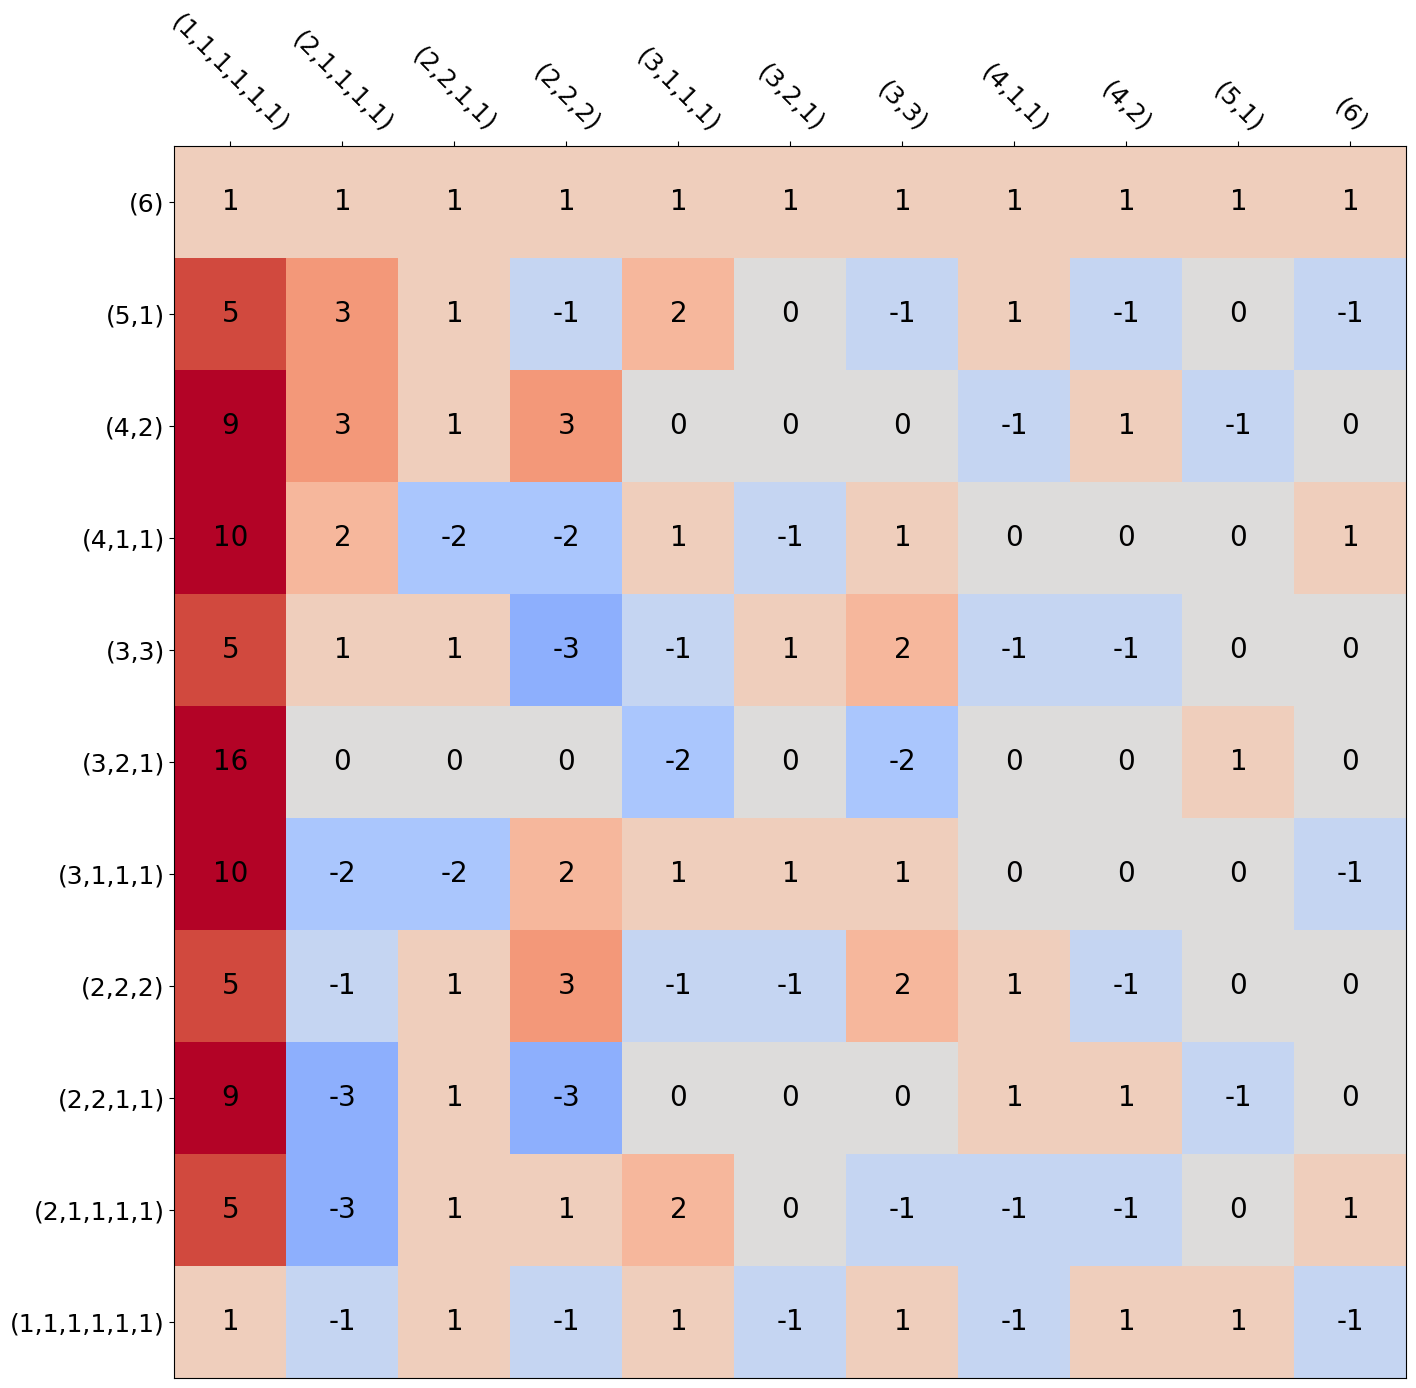

In [3]:
n_fb = 6    # Size of Character Table
partition_list = fb.convert_dict_partitions_to_list(n_fb)
character_table = fb.get_character_table(n_fb)
character_table = pd.DataFrame(character_table)
heatmap(n_fb, character_table, threshold=6, partition_list=partition_list)

## Murnaghan-Nakayama Rule
Modifcations:
- n_mn: Size of Character Table

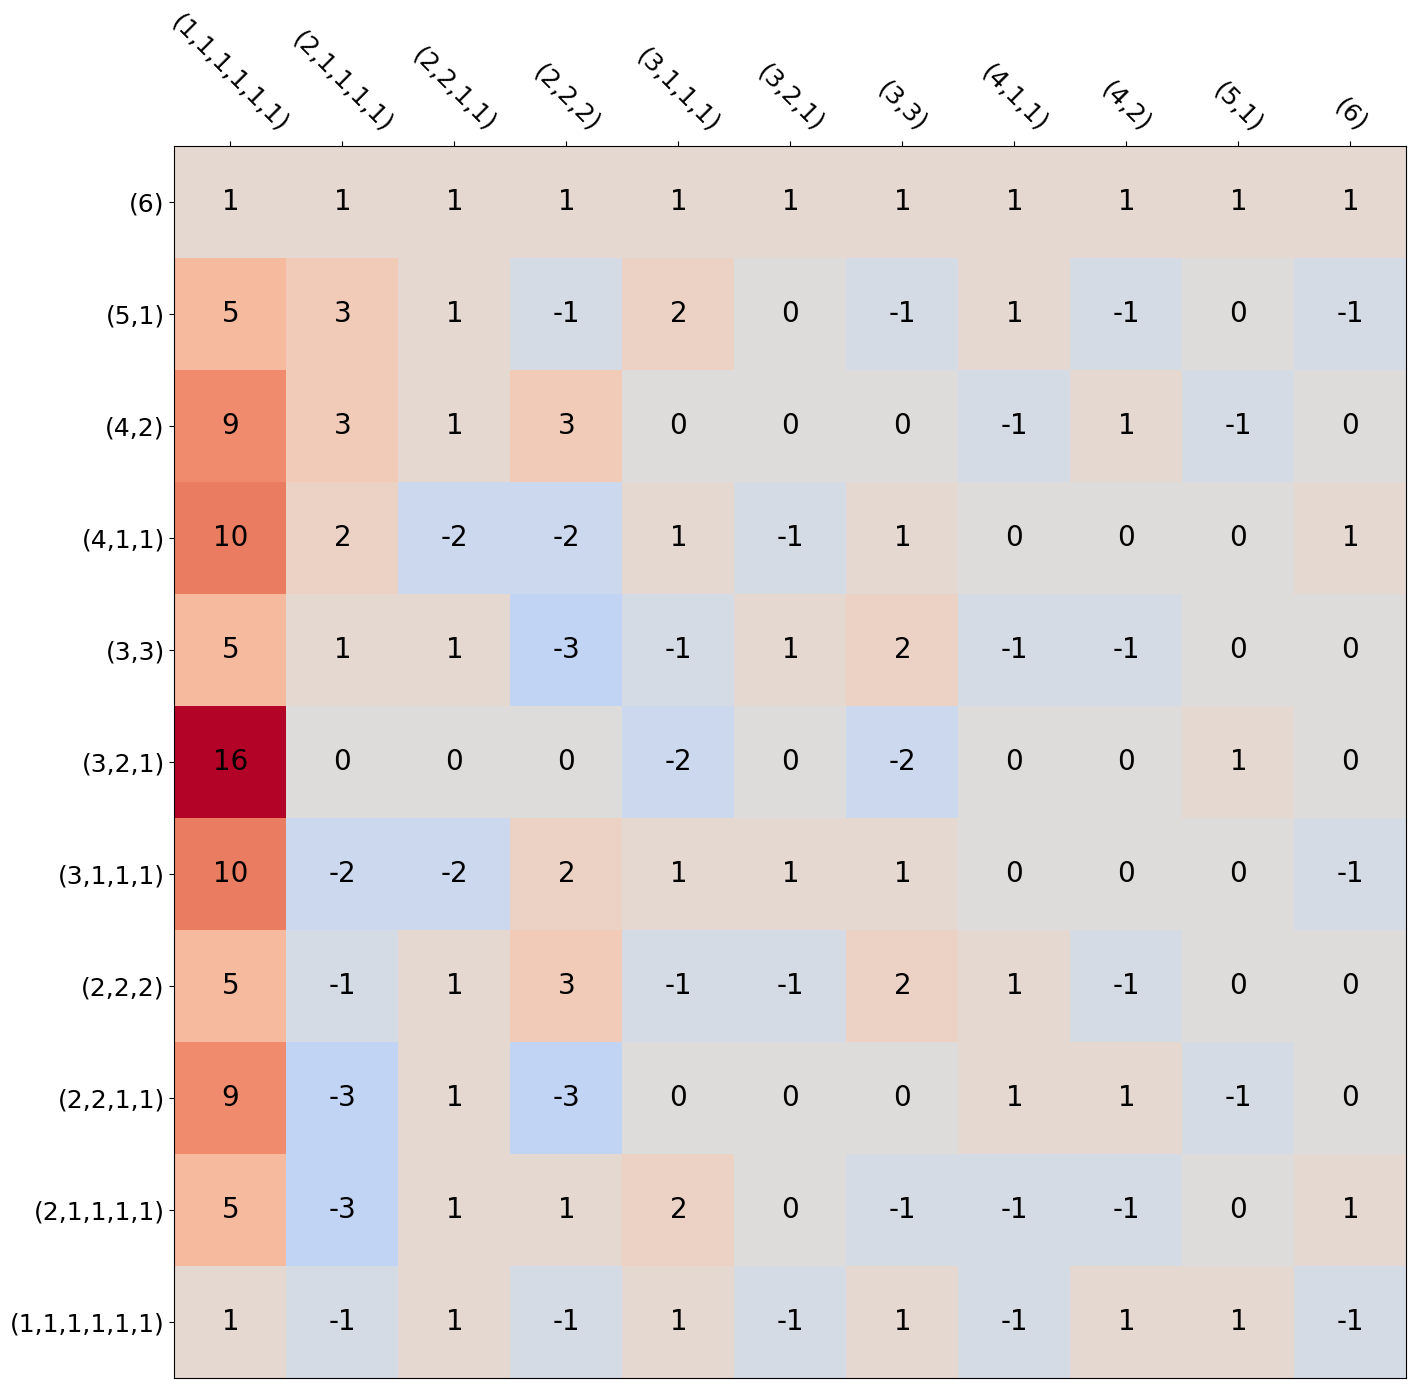

In [4]:
n_mn = 6    # Size of Character Table
partition_list = fb.convert_dict_partitions_to_list(n_mn)
character_table = mn.get_character_table(n_mn, memo_file_name="")
character_table = pd.DataFrame(character_table)
heatmap(n_mn, character_table, partition_list=partition_list)

## Heatmaps


Now we study some character tables with bigger sizes.

Since the value for some entries are too big, in order to make the color look proportional, we can truncate the value and set up a threshold for the heatmap

Files required:
- S{N}.csv

Modifications:
- N: Size of Character Table
- THRESHOLD: Truncate the values of the table and set up a threshold for the heatmap



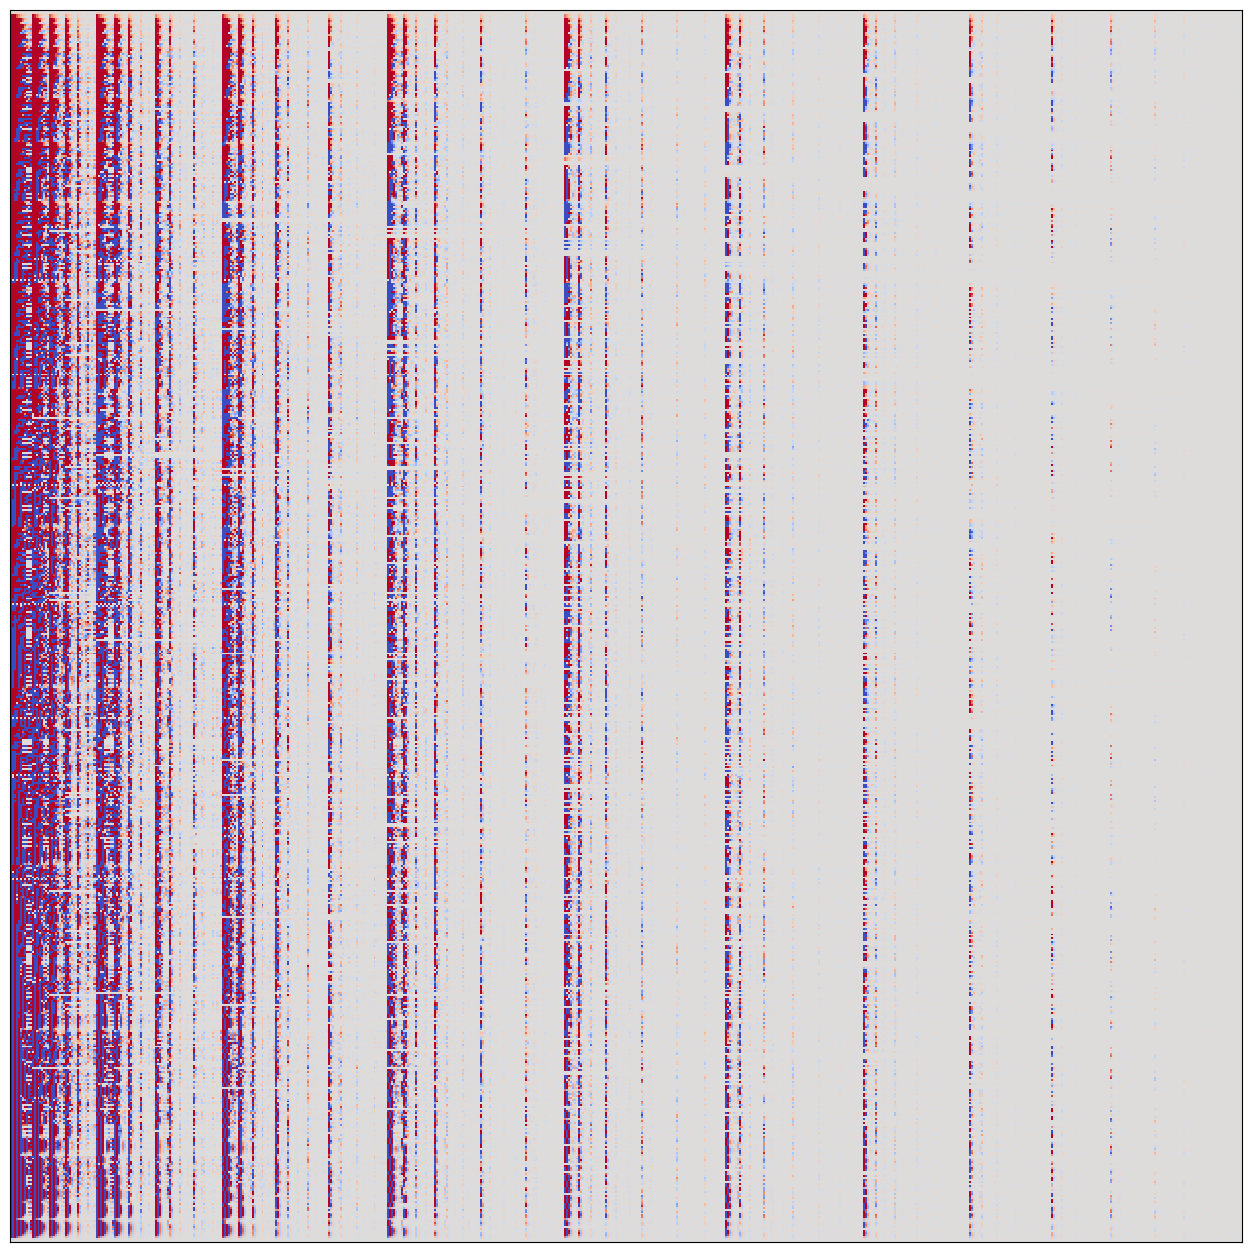

In [5]:
N = 20  # Size of Character Table
THRESHOLD = 100  # Cutoff Value

df = pd.read_csv("S{}.csv".format(N), header=None)
df_wo_first_column = df.iloc[0:, 0:]
# df_wo_first_column = df.iloc[1:, 1:]  # skip the first column
heatmap(N, df_wo_first_column, threshold=THRESHOLD)

## Distribution of the first column

Now we focus on the first column of the character table, note that they are all positive according to the hook length formula.

Files required:
- S{N}.csv

Modifications:
- N: Size of Character Table


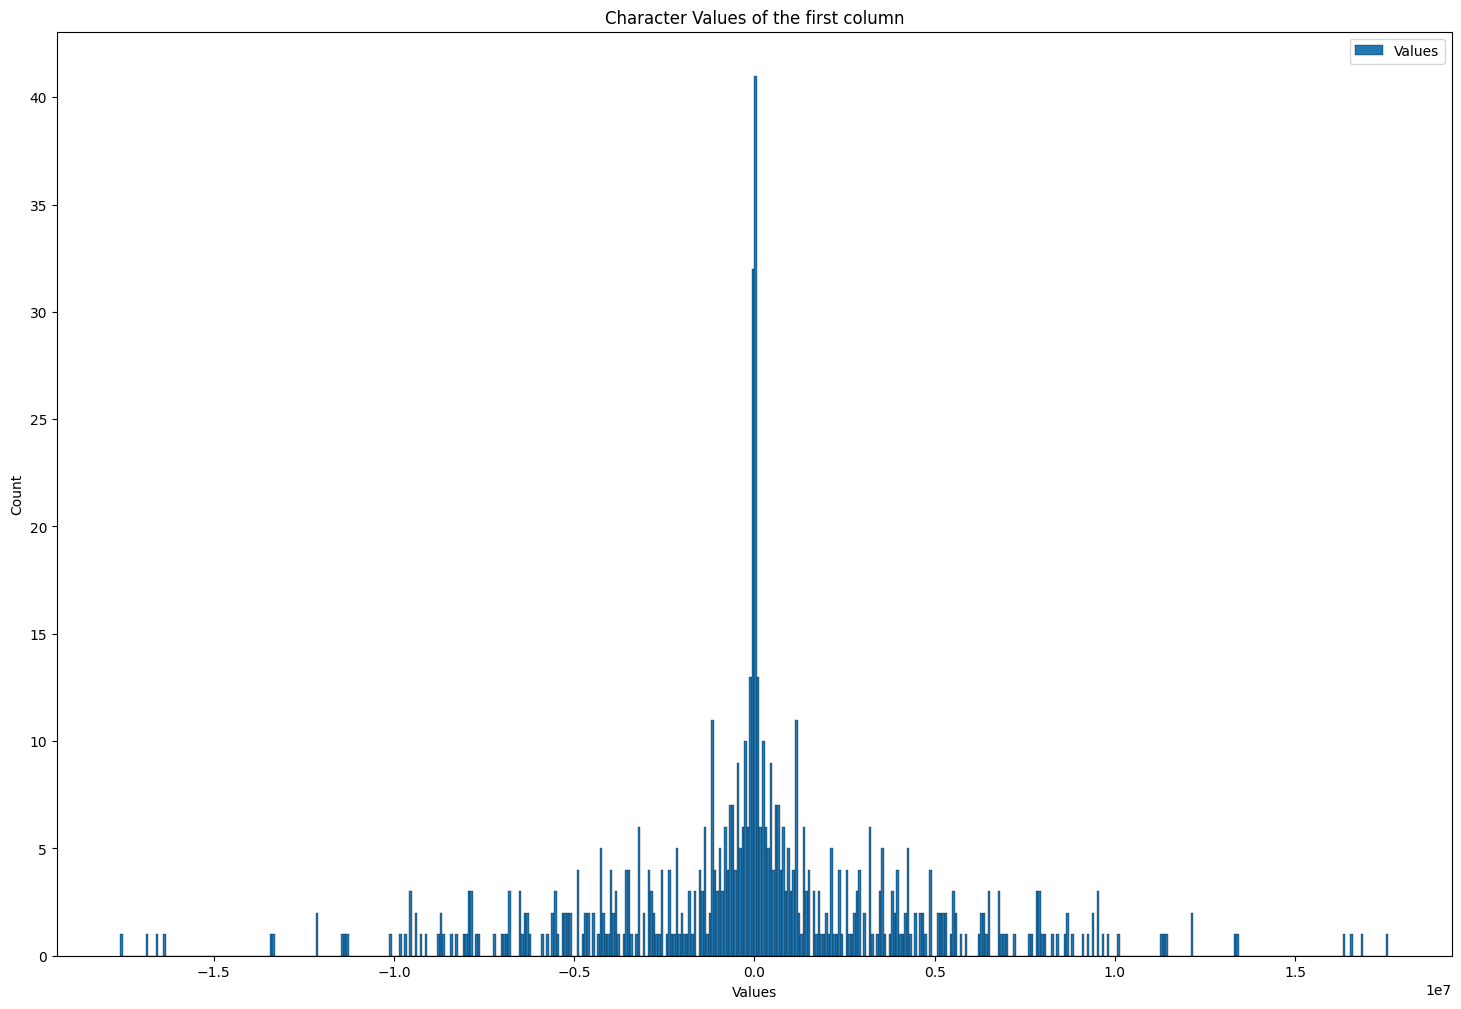

In [6]:
N = 20  # Size of Character Table

df = pd.read_csv("S{}.csv".format(N), header=None)
first_column = df.iloc[:, 1]
values = first_column.values
df2 = pd.DataFrame(values, columns=["Values"])
ax = df2.plot(kind="hist", edgecolor="black", bins=500,
              linewidth=0.2, figsize=(18, 12))
plt.xlabel("Values")
plt.ylabel("Count")
plt.title("Character Values of the first column")
plt.show()

## The Density of Zeros in the Character Table of $S_n$

Now we study the number of zero entries in the character table of $S_n$ (it is recorded in OEIS with index [A006907](https://oeis.org/A006907)).


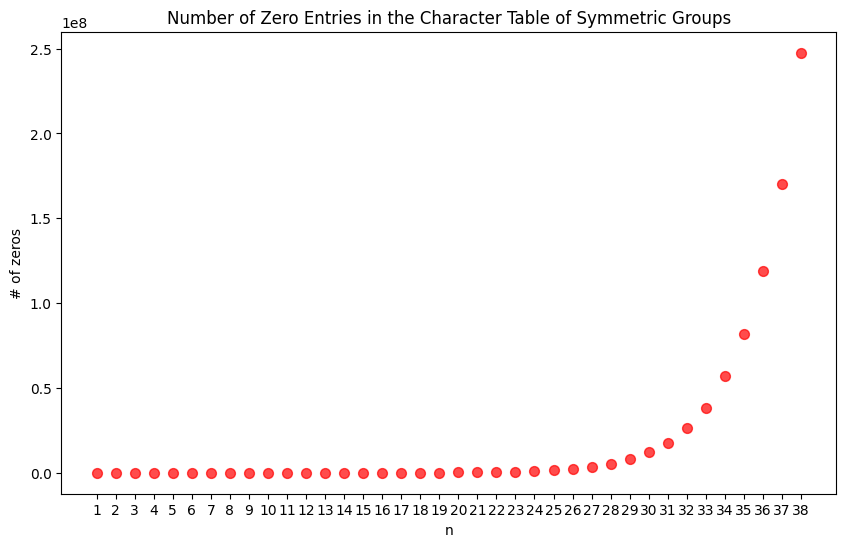

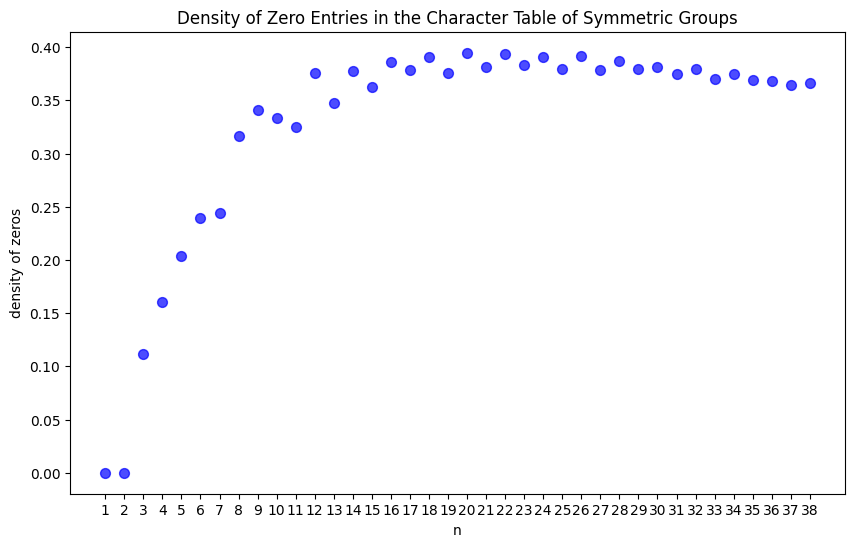

In [7]:
num_of_zeros = [0, 0, 1, 4, 10, 29, 55, 153, 307, 588, 1018, 2230, 3543, 6878,
                11216, 20615, 33355, 57980, 90194, 155176, 239327,
                395473, 604113, 970294, 1453749, 2323476, 3425849,
                5349414, 7905133, 11963861, 17521274, 26472001,
                38054619, 56756488, 81683457, 119005220, 170498286,
                247619748]

num_of_partitions = [1, 2, 3, 5, 7, 11, 15, 22, 30, 42, 56, 77, 101, 135, 176, 231,
                     297, 385, 490, 627, 792, 1002, 1255, 1575, 1958, 2436, 3010,
                     3718, 4565, 5604, 6842, 8349, 10143, 12310, 14883, 17977,
                     21637, 26015, 31185, 37338, 44583, 53174, 63261, 75175,
                     89134, 105558, 124754, 147273, 173525]

density_of_zeros = [num_of_zeros[i] /
                    (num_of_partitions[i] ** 2) for i in range(38)]

df = pd.DataFrame({"Values": num_of_zeros})
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=df.index, y=df["Values"], color="red", s=50, alpha=0.7)
ax.set_xticks(df.index)
ax.set_xticklabels(df.index + 1)  # Assuming the data is 0-indexed
ax.set_xlabel("n")
ax.set_ylabel("# of zeros")
ax.set_title(
    "Number of Zero Entries in the Character Table of Symmetric Groups")
plt.show()

df2 = pd.DataFrame({"Values": density_of_zeros})
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.scatter(x=df2.index, y=df2["Values"], color="blue", s=50, alpha=0.7)
ax2.set_xticks(df2.index)
ax2.set_xticklabels(df2.index + 1)
ax2.set_xlabel("n")
ax2.set_ylabel("density of zeros")
ax2.set_title(
    "Density of Zero Entries in the Character Table of Symmetric Groups")
plt.show()

## Freq. Distribution of Staircase Partition in Triangular Numbers

Files required:
- S{N}_staircase.csv

Modifications:
- N: Size of Character Table of Triangular Number


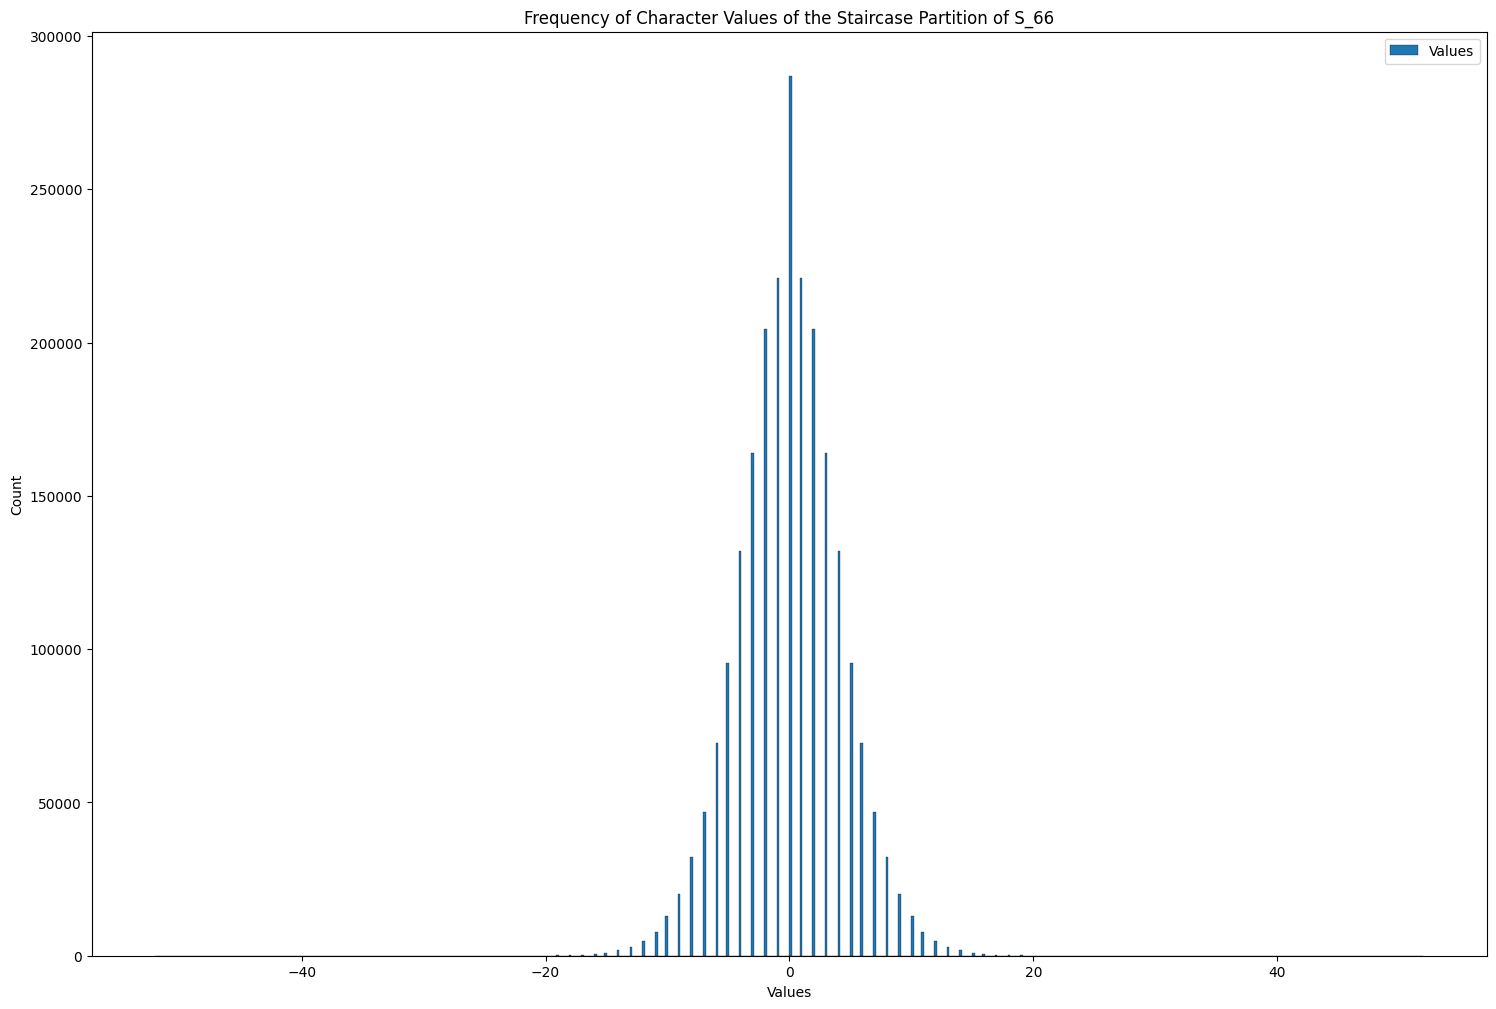

In [8]:
N = 66  # Size of Character Table

df = pd.read_csv("S{}_staircase.csv".format(N))
first_column = df.iloc[0:, 0]
positions = range(len(first_column))
values = first_column.values
df2 = pd.DataFrame(values, columns=["Values"])

ax = df2.plot(kind="hist", edgecolor="black", bins=500,
              linewidth=0.2, figsize=(18, 12))
plt.xlabel("Values")
plt.ylabel("Count")
plt.title(
    "Frequency of Character Values of the Staircase Partition of S_{}".format(N))
plt.show()

## Density of Zeroes in Staircase Partitions

File required:
- S{N}_staircase.csv for all N's in x_axis list

Modifications:
- x_axis: All triangular numbers to be plotted (requires the corresponding file)

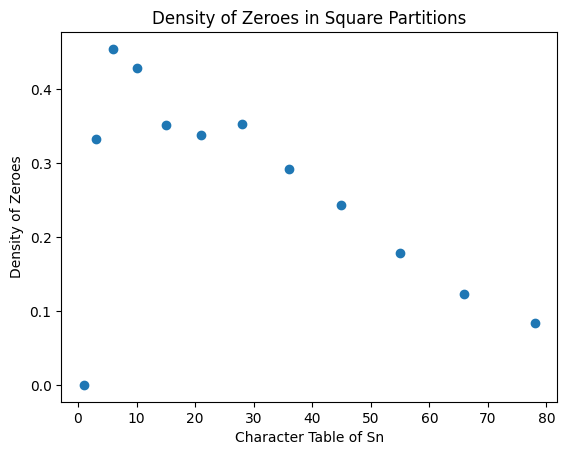

In [9]:
x_axis = [1, 3, 6, 10, 15, 21, 28, 36, 45, 55, 66, 78]

density_of_zeroes = []
for N in x_axis:
    df = pd.read_csv("S{}_staircase.csv".format(N), header=None)
    no_zeroes = (df == 0).sum().sum()
    density_of_zeroes.append(no_zeroes / len(df.values))

plt.scatter(x_axis, density_of_zeroes)
plt.xlabel("Character Table of Sn")
plt.ylabel("Density of Zeroes")
plt.title("Density of Zeroes in Square Partitions")
plt.show()

## Desnity of l mod p in Staircase Partitions

File required:
- S[N]_staircase.csv for all N's in the x_axis list

Modifications:
- p: Any prime number
- l: Any integer between 0 and p-1 (both inclusive)
- x_axis: All triangular numbers to be plotted (requires the corresponding file)

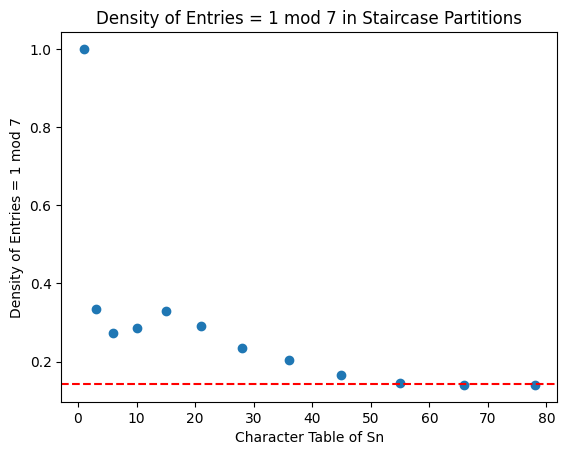

In [10]:
p = 7   # Any prime number
l = 1   # Any integer between 0 and p-1 (both inclusive)
x_axis = [1, 3, 6, 10, 15, 21, 28, 36, 45, 55, 66, 78]

density_of_mod = []
for N in x_axis:
    df = pd.read_csv("S{}_staircase.csv".format(N), header=None)
    even_entries = (df % p == l).sum().sum()
    density_of_mod.append(even_entries / len(df.values))

plt.scatter(x_axis, density_of_mod)
plt.axhline(y=1 / p, color="r", linestyle="--", label="y = 1/{}".format(p))
plt.xlabel("Character Table of Sn")
plt.ylabel("Density of Entries = {} mod {}".format(l, p))
plt.title("Density of Entries = {} mod {} in Staircase Partitions".format(l, p))
plt.show()